### Описание проекта

Цель проекта: Выявить определяющие успешность игры закономерности.
Основные источники: Файл с данными об играх "gamex.csv"

План проекта:
- Открыть и изучить файл с данными 
- Провести предобработку данных (поменять типы данных, проверить дубликаты, заполнить пропуски и т.д)
- Определеть текущуюю ситуацию на рынке видеоигр и характерный срок "популярности" игровой платформы
- Определить более перспективные платформы
- Рассмотреть три основных региона , определить препочтения публики 
- Проверит две гипотезы:  равенство средних рейтингов на платформах Xbox one и PC, а также равенство рейтингов двух жанров Action и Sports

## Шаг 1.Введение

### 1. Изучение переданного датасета

In [ ]:
import pandas as pd

games = pd.read_csv('/datasets/games.csv')
games.info()
games.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Вывод

На данном этапе были выполненны следующие действия: 
- Прочитан файл с исходными данными методом read_csv()
- Создан стартовый датафрейм "games"
- Просмотрены исходные данные 

Основные ***выводы*** по данному шагу: 
- Всего записей: 116.715
- Всего колонок: 11 шт.
- Многие колонки имеют пропуски. 
- Присутствуе верхний регистр в названиях колонок.
- Колонка с годом имеет недходящий тип данных 

## Шаг. 2 Предобработка данных

### 2.1 Измнение наименований колонок и данных в столбцах с названием игр,  платформы и жанра


In [ ]:
def to_lower(column):
    games[column] = games[column].str.lower()
    return games[column]

column_to_lower = ['name','platform','genre']
games.columns = [ x.lower() for x in games.columns]

for name in column_to_lower:
    to_lower(name)    

games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**промежуточные итоги:**
- были приведены к нижнему регистру название столбцов, так как это облегчает работу
- были приведены к нижнему регистру все данные типа string, чтобы в дальнейшем провести проверку на наличие дубликатов (может их и нет , но нужно об этом помнить)

### 2.2 Работа с пропусками
### 2.2.1 Общая замена

In [ ]:
games['year_of_release'] = games['year_of_release'].fillna('-1')
games['name'] = games['name'].fillna('unknown')
games['genre'] = games['genre'].fillna('unknown')
games['rating'] = games['rating'].fillna('unknowm')
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)

**Промежуточные итоги:**
- пропущенные значение в колонке "genre", "name", "rating" были заменены на "unknown" так как востоновить их точно нельзя
- колонки "year_of_release", 'critic_score' и 'user_score' были пока что заменены на "-1".Последние двадалее будут разбираться более детально, идея - при наличии связи между этими столбцами попробовать востановить часть данных

### 2.2.2 Более детальная работа с пропусками в столбцах "critic_score" и "user_score"

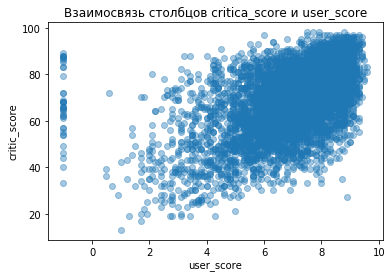

0.5405497817852861

In [ ]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

fill_good_data = games.query('user_score != "-1" &'
                            'critic_score != "-1" &'
                            'user_score != "tbd" ')
fill_good_data['user_score'] = fill_good_data['user_score'].astype('float')
fill_good_data['critic_score'] = fill_good_data['critic_score'].astype('int')
fill_good_data.corr()



plt.figure()
plt.title('Взаимосвязь столбцов critica_score и user_score')
plt.scatter(fill_good_data['user_score'], fill_good_data['critic_score'], alpha = 0.4)
plt.xlabel('user_score')
plt.ylabel('critic_score')
plt.show()

fill_good_data['user_score'].corr(fill_good_data['critic_score'])


**промежуточные итоги:**
- Несмтря на то, что график вцелом указывает на налачие зависимости между рейтингами критиков и пользователей, однако, можно видеть, что присутствует отчень большой разброс, что может указывать на слабую связь. Данный факт подтверждается низским коэффициентом корреляции (0.58). Основывая на этом, можно сказать, что заполнение пропусков при помощи такого варината может сильно исказить реальную ситуацию. 

### 2.2.3 Обработка значений "tbd"

In [ ]:
games = games.replace('tbd', -1)

**промеуточные итоги:**
- Так как 'tbd' значит, что рейтинг еще не присвоен, а это в свою означает, что на данный момент рейтинг отсутствует. На прошлом этапе, мы определили, что востановить данный рейтинг не получится, так как между данными нет сильной связи и любые замены могут привести к искажению, так что принято решение действовать с такими значениями как с обычным NaN

### 2.3 Преобразование данных в нужные типы и создание нового столбца

In [ ]:
def to_type(column,types):
    games[column] = games[column].astype(types) 
    return games[column] 
to_type('year_of_release', 'int')
to_type('critic_score', 'int')
to_type('user_score', 'float')

games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'] 

games.info()
print()
print('Дубликатов обнаружено:',games.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null int64
user_score         16715 non-null float64
rating             16715 non-null object
total_sales        16715 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB

Дубликатов обнаружено: 0


### Выводы по  этапу "Предобработка данных":

- Все пропущенные значения заменены
- пропущенные значение в колонке "year_of_release", "genre", "name", "rating" были заменены на "unknown" так как востоновить их точно нельзя. 
- значения в столбцах "user_score", "critic_score" были заменены на -1, так как корреляция между ними не самая сильная и востановить значения нельзя
- значения 'tbd' были заменены на -1, так как по смыслу это тот же пропуск данных, что и обычное NaN
- столбцы 'year_of_release' и 'critical_score' были переведены в тип 'int' так как не предполают десятичное число. Столбец 'user_score' был переведен из типа object в тип float, после устранения tbd
- создан столбец 'total_sales', который отражает сумму продаж по всем регионам
- дубликатов не было обнаружено

## Шаг 3. Визуальный анализ данных

### 3.1 Общий анализ историчесских данных

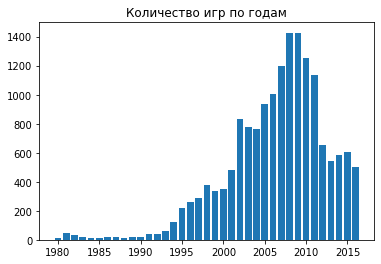

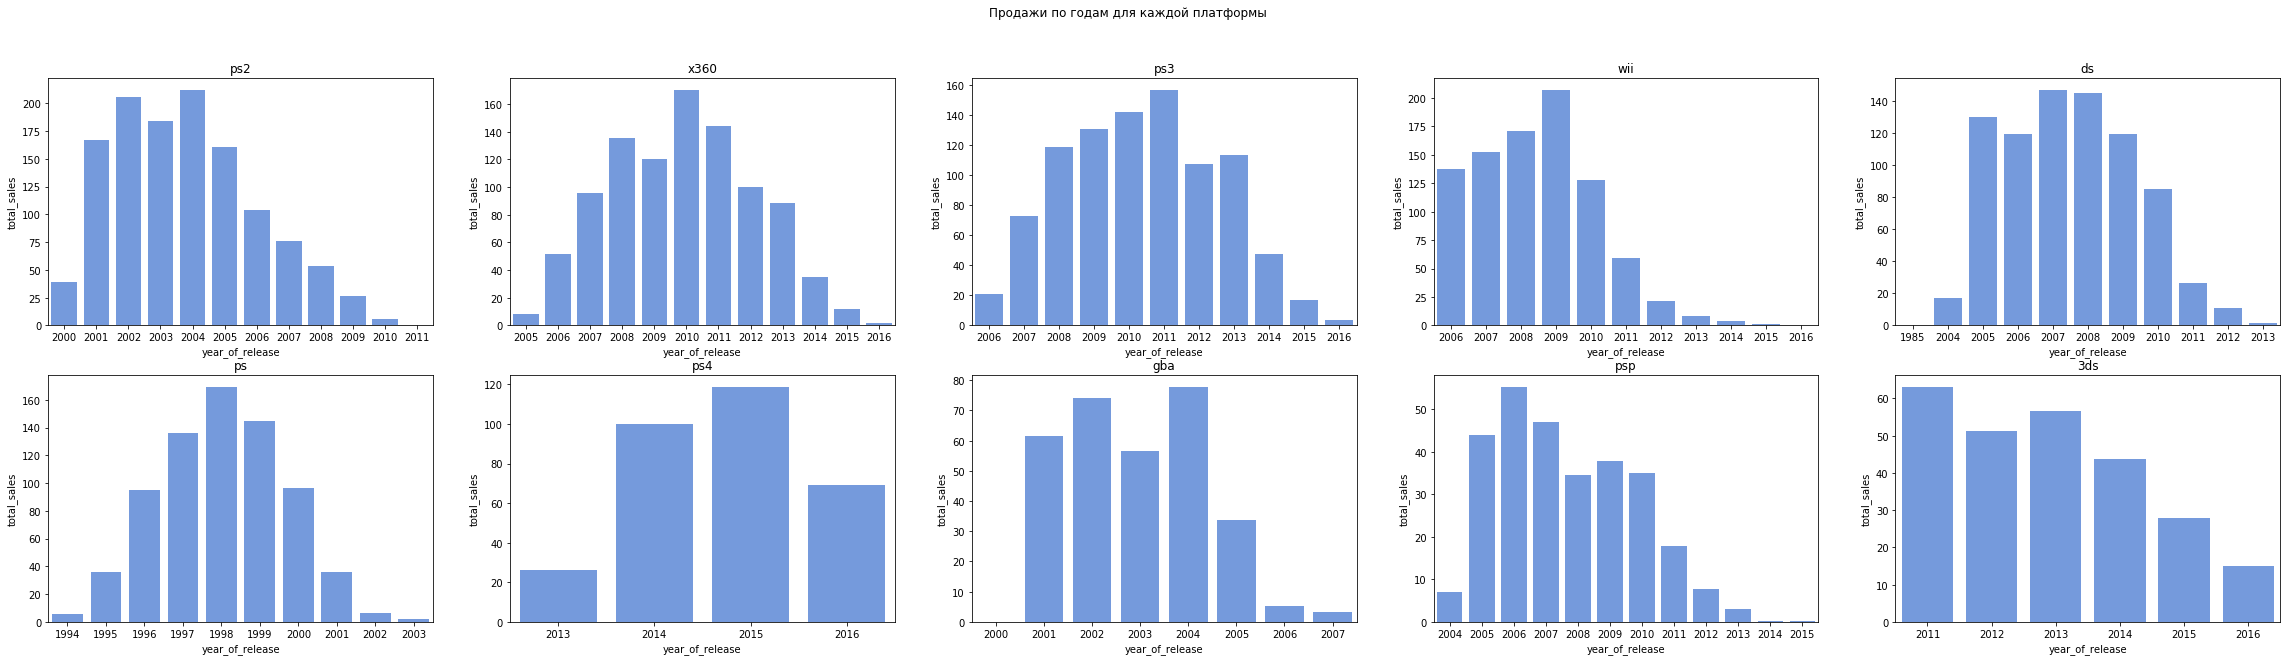

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

clear_games = games.query('year_of_release != "-1"')
games_by_year = clear_games.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'count').reset_index()
games_by_year.columns = ['year','games_count']

plt.figure()
plt.title('Количество игр по годам')
plt.bar(games_by_year['year'], games_by_year['games_count'])
plt.show()

platform_sales = clear_games.pivot_table( index = 'platform', values = 'total_sales', aggfunc = 'sum')
platform_sales = platform_sales.sort_values(by = 'total_sales' , ascending = False).head(10)
top_platform = list(platform_sales.index)
platform_by_year = clear_games.query('platform in @top_platform') 
platform_by_year = platform_by_year.pivot_table( index = ['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'sum').reset_index()


def sales_by_year(data, list_platform):
    plt.figure( figsize = (40,10))
    plt.suptitle('Продажи по годам для каждой платформы')
    n = 0
    for platform in list_platform:
        n += 1
        plt.subplot(2,5,n)
        plt.title(platform)
        require_platforma = platform
        current_data = data.query('platform == @require_platforma')
        sns.barplot(x = current_data['year_of_release'], y = current_data['total_sales'], color = 'cornflowerblue' )
    plt.show()

sales_by_year(platform_by_year,top_platform)

***Промежуточные итоги:***
- Основной пик игровой индустрии пришелся на период с 2005-2010
- С 2012 по 2016 количество выпущенных игр остается стабильным 
- Характерный срок замены старых платформ на новых около 5-6 лет

### 3.2 Анализ актуального периода 

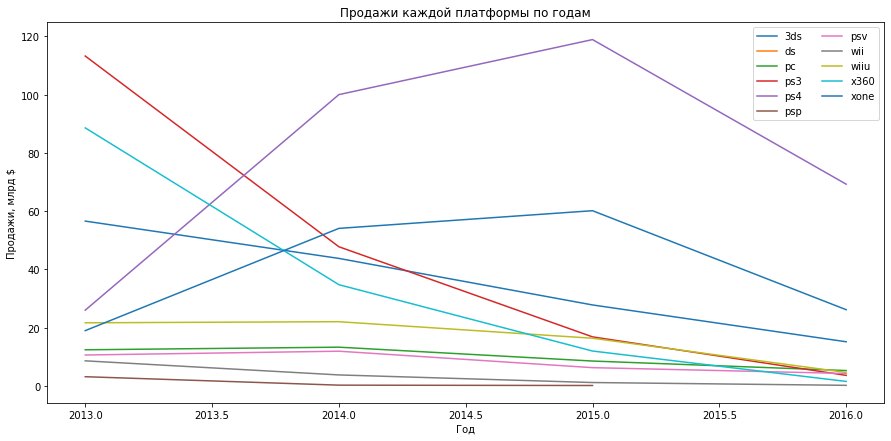

In [ ]:
actual_games = clear_games.query('year_of_release >= 2013')
sales = actual_games.pivot_table( index = ['platform','year_of_release'], values = 'total_sales', aggfunc = 'sum').reset_index()
platform_list_actual = list(sales['platform'].unique())


def plot_platform_sales(data, list_of_platform ):
    plt.figure(figsize = (15,7))
    for platform in list_of_platform:
        require_platform = platform
        df = data.query('platform == @require_platform')
        plt.title('Продажи каждой платформы по годам')
        plt.plot(df['year_of_release'], df['total_sales'], label = require_platform)
        plt.xlabel('Год')
        plt.ylabel('Продажи, млрд $')
        plt.legend(loc = 1, ncol = 2)       
    plt.show()
    

plot_platform_sales(sales,platform_list_actual)

***Промежуточный итог:***
- Более интересными платформы : ps4, xone и 3ds. Но нужно понимать, что их срок "популярности" походит уже к концу. (но это не так важно, если составляем прогноз на 2017)

### 3.3 Анализ продаж каждой игры в разбивке по платформам

Cредние глобальные продажи за период с 2013 - 2016 года:


,mean,std
ps4,0.306213,0.384944
xone,0.343227,0.403082
3ds,0.130837,0.138754


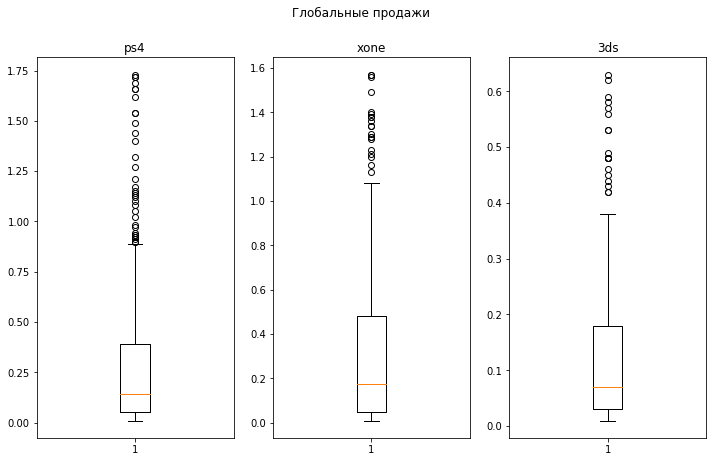

In [ ]:
games_plat = actual_games.query('platform == ["ps4","xone", "3ds"]')
actual_platform = ["ps4","xone", "3ds"]

def boxplot(dfs):
    plt.figure(figsize = (12,7))
    plt.suptitle('Глобальные продажи')
    n = 0
    name = ['ps4','xone', '3ds']
    for data in dfs:
        n +=1
        plt.subplot(1,3,n)
        plt.title(name[0+n-1])
        plt.boxplot(data['total_sales'])
    plt.show
    
def outpoint(data, platform):
    platform = platform
    df = data.query('platform == @platform')['total_sales']
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    return low, high


def avr_std_sales_dfs(dfs):
    mean_all = []
    std_all = []
    for data in dfs:
        mean = data['total_sales'].mean()
        mean_all.append(mean)
        std = data['total_sales'].std()
        std_all.append(std)
    return mean_all , std_all


ps4_l, ps4_h = outpoint(games_plat,'ps4')
xone_l, xone_h = outpoint(games_plat,'xone')
ds_l, ds_h = outpoint(games_plat,'3ds')



good_stat_ps4 = games_plat.query('platform == "ps4" &'
                                '@ps4_l < total_sales < @ps4_h')

good_stat_xone = games_plat.query('platform == "xone" &'
                                '@xone_l < total_sales < @xone_h')

good_stat_3ds = games_plat.query('platform == "3ds" &'
                                '@ds_l < total_sales < @ds_h')


stat_list = [good_stat_ps4 ,good_stat_xone ,good_stat_3ds]

means_list, std_list = avr_std_sales_dfs(stat_list)

means_platform = pd.DataFrame( { 'mean' : means_list, 'std' : std_list}, index =['ps4','xone', '3ds'])



print('Cредние глобальные продажи за период с 2013 - 2016 года:')
boxplot(stat_list)
means_platform



***промежуточные итоги:***
- Можем видеть, что продажи у двух первых платформ ( ps4 и xone) схожи, однако, у xone более длинный верхний "ус", что может указывать на легкую скошенность продаж
- меньший самый разброс по продажам у 3ds
- Выручки также у первых двух платформ существенно не отличаются, а вот у 3ds, средняя продажа намного ниже, чем у других
- Однако, стандратное отклонение давольно высокое у всех


### 3.4 Анализ влияния рейтингов на продажи

Корреляция между total_sales и critic_score : 0.2645723362375023
Корреляция между total_sales и user_score : 0.03208779736823888


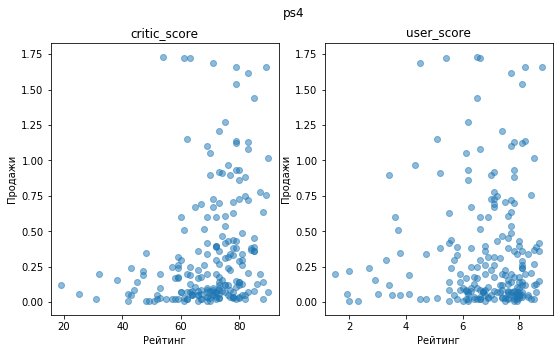

Корреляция между total_sales и critic_score : 0.4201338687981549
Корреляция между total_sales и user_score : 0.05990079044888021


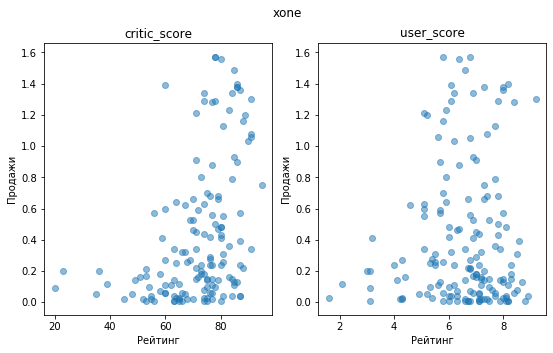

Корреляция между total_sales и critic_score : 0.25914443255978287
Корреляция между total_sales и user_score : -0.05997844176895947


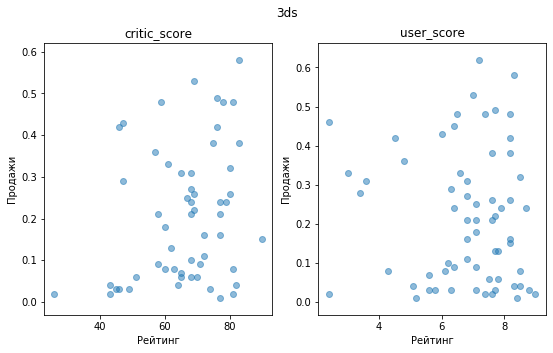

In [ ]:
stat_ps4_cs = good_stat_ps4.query('critic_score != -1')
stat_ps4_us = good_stat_ps4.query('user_score != -1')

stat_xone_cs = good_stat_xone.query('critic_score != -1')
stat_xone_us = good_stat_xone.query('user_score != -1')

stat_3ds_cs = good_stat_3ds.query('critic_score != -1')
stat_3ds_us = good_stat_3ds.query('user_score != -1')


score_name = ['critic_score', 'user_score']
def scatter_plot(dfs, plaform_name, score_names):
    plt.figure(figsize = (9, 5))
    plt.suptitle(plaform_name)
    n = 0
    for data in dfs:
        n += 1
        plt.subplot(1,2,n)
        plt.title(score_name[n-1])
        plt.scatter( data[score_name[n-1]],data['total_sales'], alpha = 0.5)
        plt.xlabel('Рейтинг')
        plt.ylabel('Продажи')
        corr = data['total_sales'].corr(data[score_name[n-1]])
        print('Корреляция между total_sales и',score_name[n-1],':',corr)
    plt.show()


    
scatter_plot([stat_ps4_cs,stat_ps4_us], 'ps4', score_name)   
scatter_plot([stat_xone_cs,stat_xone_us], 'xone', score_name)
scatter_plot([stat_3ds_cs,stat_3ds_us], '3ds', score_name)


***Промежуточные итоги:***
- Так как данные графики не указывают на явную тенденцию при которой с повышением рейтинга повышаются продажи (график должен был быть ПРИМЕРНО похож на линию из угла между осей (биссектрису), примерно, как график из 2.2.2). Да, есть некоторые игры с высоким рейтингом и высокими продажами, но их мало. Но на графиках можно увидеть большое скопление игр с высоким рейтингом и низкими продажами. Основываясь на этом можно сделать вывод, что рейтинги не влияют в целом на продажи. Данный вывод подтверждается также и коэффициентом корреляции, который указывает на несильную  связь между данными параметрами.


### 3.5 Анализ жанров

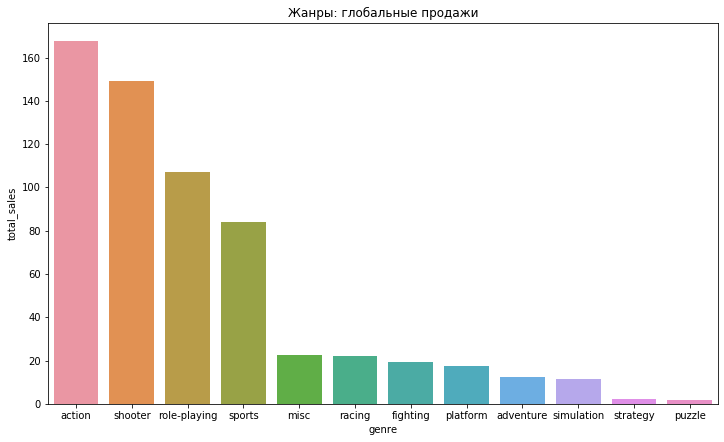

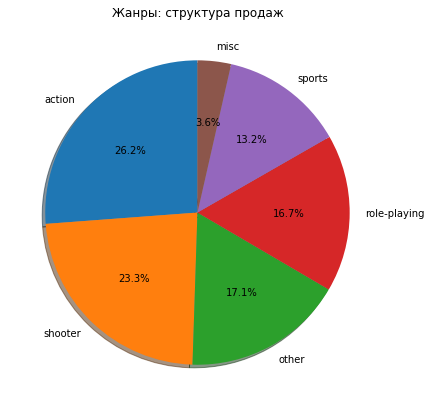

In [ ]:
genre_sales = games_plat.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum')
genre_sales = genre_sales.sort_values(by ='total_sales' , ascending = False).reset_index()
genre_sales['share'] = genre_sales['total_sales'] / genre_sales['total_sales'].sum() * 100

genre_pie = genre_sales.append({'genre' : 'other' , 'share' : 100 - genre_sales['share'].head(4).sum() } , ignore_index=True)
genre_pie = genre_pie.sort_values(by = 'share' , ascending = False).head(6)

plt.figure(figsize = (12,7))
plt.title('Жанры: глобальные продажи')
sns.barplot(x = genre_sales['genre'] , y = genre_sales['total_sales'])
plt.show()
genre_sales['share'] = genre_sales['total_sales'] / genre_sales['total_sales'].sum() * 100

plt.figure(figsize = (12,7))
plt.title('Жанры: структура продаж')
labeles = genre_pie['genre']
sizes = [genre_pie['share']]
plt.pie(sizes, labels = labeles,  autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()



***Промежуточные итоги:***
- Самые большие продажи у "Action" и "Shooter". Оданако, достаточно большие продажи также у "RPG" и "Sports" жанров. На данные 4 жанра приходится более 82% всех продаж.
- Самые же низкие продажи наблюдаются в жанрах "Strategy" и "Puzzle".

### Выводы по этапу "Визуальный анализ данных"

- Пик выпуска видеоигр пришел на 2005- 2010 года. В последние пару лет он сильно снизился, но по итогу стабилизировался на уровне 500-600 игр в год
- Характерный срок актуальности платформы на рынке около 5ти лет 
- Актуальный перио для анализа - 4 года. 
- Самыми преспективными на ближайшие года два (2017/2018) платформами являются: PS4, XONE, 3DS. Но нужно понимать, что их срок также подходит к концу.
- Общее кол-во продаж ( общая сумма и средняя сумма продаж) не сильно отличаются у XONE и PS4, и являются самыми высокими в период с 2013 по 2016, однако, данные показатели сильно отличаются у 3DS, которые в три раза меньше.
- Сильной корееляционной связи между продажами и рейтингами не было обнаружено среди трех анализируемых платформ
- Самыми популярными жанрами являются: action, shooter, role-playing и sports (более 82% продаж)
- Самыми непопулярными жанрами являются : strategy и puzzle

## Шаг 4. Составление портрета пользователя каждого региона.


### Тех. часть

In [ ]:
def create_dfs(group, col_sales):
    top_platforms = actual_games.pivot_table(index = group[0], values = col_sales , aggfunc = 'sum')
    top_platforms = top_platforms.reset_index().sort_values(by = col_sales , ascending = False)
    top_platforms['share'] =  top_platforms[col_sales] / top_platforms[col_sales].sum() * 100
    top_platforms = top_platforms.append({'platform' : 'other' , 'share' : 100 - top_platforms['share'].head(5).sum() } , ignore_index=True)
    top_platforms = top_platforms.sort_values(by = 'share' , ascending = False).head(6)
    
    
    top_genre = actual_games.pivot_table(index = group[1], values = col_sales , aggfunc = 'sum')
    top_genre = top_genre.reset_index().sort_values(by = col_sales , ascending = False)
    top_genre['share'] =  top_genre[col_sales] / top_genre[col_sales].sum() * 100 
    top_genre = top_genre.append({'genre' : 'other' , 'share' : 100 - top_genre['share'].head(5).sum() } , ignore_index=True)
    top_genre = top_genre.sort_values(by = 'share' , ascending = False).head(6)
    return top_platforms, top_genre

def pie_chart(dfs, suptitle, list_keys, title):
    plt.figure( figsize = (15,7))
    plt.suptitle(suptitle)
    n = 0
    for data in dfs:
        n += 1
        plt.subplot(1,2,n)
        plt.title(title[n-1])
        labels = data[list_keys[n-1]]
        sizes = data['share']
        plt.pie(sizes, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.show()
    
def rating_esr(title, key):
    rating_data = actual_games.query('rating != "unknowm"').pivot_table(index = 'rating', values = key, aggfunc = 'sum')
    rating_data = rating_data.reset_index().sort_values(by = key, ascending = False)
    plt.figure()
    plt.title(title)
    sns.barplot(x = rating_data['rating'], y = rating_data[key])
    plt.show()
    
groups = ['platform', 'genre']
titles = ['Продажи по платформам', 'Продажи по жанрам']

### 4.1. Северная Америка

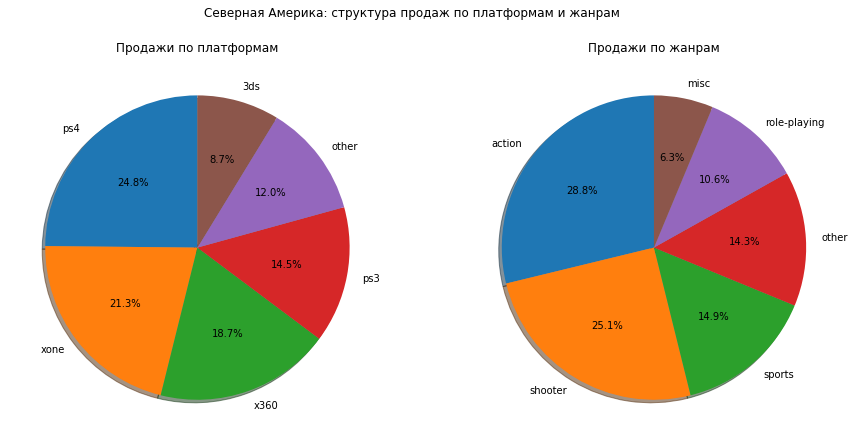

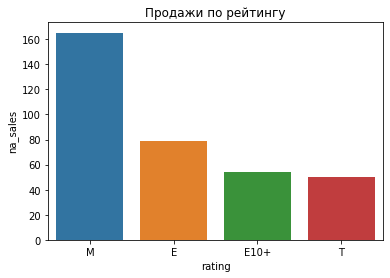

In [ ]:
top_platforms_na, top_genres_na = create_dfs(groups, 'na_sales')
pie_chart([top_platforms_na,top_genres_na], 'Северная Америка: структура продаж по платформам и жанрам', groups, titles)
rating_esr('Продажи по рейтингу', 'na_sales')

***Промежуточные итоги:***
- Практически одинаковые доли платформ от Microsoft(Xbox one, x360)  и Sony (ps4, ps3)
- Сев. американская публика предпочитает в основном Shooter, Action, Spots, RPG и music
- Видно, что продажи разнятся взависимости от рейтинга, однако, я считаю, это последствия предпочитаемых жанров. 

### 4.2. Европа

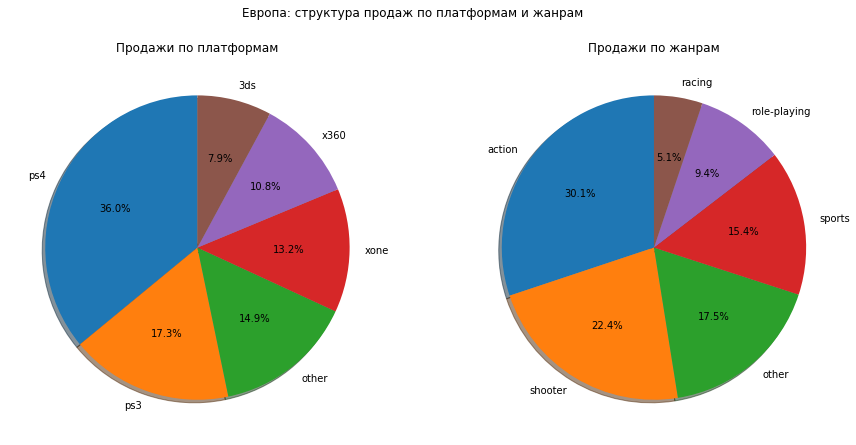

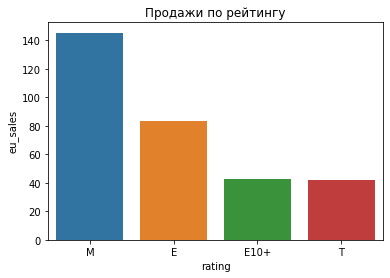

In [ ]:
top_platforms_eu, top_genres_eu = create_dfs(groups, 'eu_sales')
pie_chart([top_platforms_eu,top_genres_eu], 'Европа: структура продаж по платформам и жанрам', groups, titles)
rating_esr('Продажи по рейтингу', 'eu_sales')

***Промежуточные итоги:***
- Преобладающая доля плтаформ от компании Sony (PS4, PS3)
- Европейская публика предпочитает в основном Shooter, Action, Spots, RPG и Racing
- Видно, что продажи разнятся взависимости от рейтинга, однако, я считаю, это последствия предпочитаемых жанров. 

### 4.2. Япония

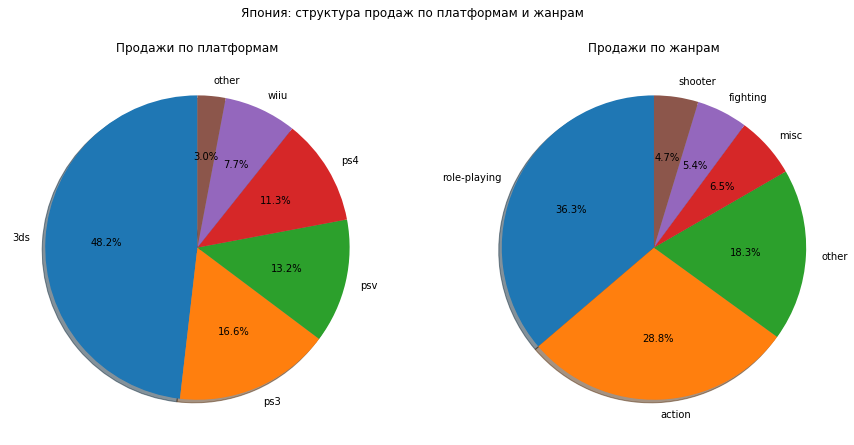

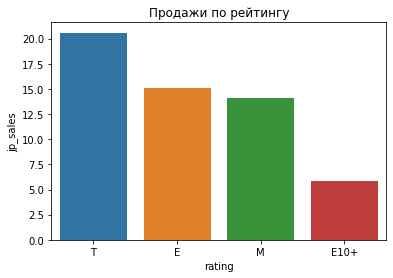

In [ ]:
top_platforms_jp, top_genres_jp = create_dfs(groups, 'jp_sales')
pie_chart([top_platforms_jp,top_genres_jp], 'Япония: структура продаж по платформам и жанрам', groups, titles)
rating_esr('Продажи по рейтингу', 'jp_sales')

***Промежуточные итоги:***
- Практически полное отсутсвие игравых платформ от Microsoft. Основа - Nintendo и Sony
- Японская публика предпочитает в основном RPG, Action, Music, Fighting,  и Shooter
- Видно, что продажи разнятся взависимости от рейтинга, однако, я считаю, это последствия предпочитаемых жанров. 

### Итоговые выводы по шагу 4 "Составление портрета пользователя каждого региона"
- Публики Европы и Северной Америки имеют более менее схожие предпочтения. 
- Япоснкий рынок видео игр сильно отличается от рынка Европы и США. Тут совершенно другие предпочтения в Жанрах. Так основной жанр - RPG, который занимает практически 36% ( В Европе и США данные жанр в среднем занимает около 10 % рынка)
- Также разбивка по рейтингам разниться, но я считаю, что это последствия популярных жанров. Так, в Европе и Сев. Америке будет более распространен рейтинг с более взрослой категорией, так как Shooter и Action в целом предполагают более жесткий контент, в отличии от того же RPG.

## Шаг 5. Проверка гипотез

### Тех. часть

In [ ]:
from scipy import stats as st

def plot_hist_rating(dfs,suptitle, titles):
    plt.figure(figsize = (12,7))
    plt.suptitle(suptitle)
    n = 0
    for data in dfs:
        n += 1
        plt.subplot(1,2, n)
        plt.title(titles[n - 1])
        sns.distplot(data)
    plt.show()
    
def t_test(data_1, data_2, alpha):
    alpha = alpha
    results = st.ttest_ind(data_1, data_2 )

    print('Итоги теста Стьюдента на равенство средних пользовательских рейтингов:')
    print()

    print('p-значение:', results.pvalue)
    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

    print()
    
def normal_test(dfs,keys):
    alpha = 0.05
    n = 0 
    for data in dfs:
        n += 1 
        k, p = st.normaltest(data)
        print(p)
        if p > alpha:
            normal = True
            print('Распределения данных у ', keys[n -1], 'нормальное')
        else:
            print('Распределения данных у ', keys[n -1], 'ненормальное')
            normal = False
    
def mannwhitney(data_1, data_2):
    alpha = 0.05 
    k, p = st.mannwhitneyu(data_1,data_2)
    print('Итоги теста Манна Уитни на равенство средних пользовательских рейтингов:')
    print()
    print('p-значение:', p)

    if (p < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

   
    

### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

0.001662552095013322
Распределения данных у  PC ненормальное
1.1534936880652902e-05
Распределения данных у  Xone ненормальное


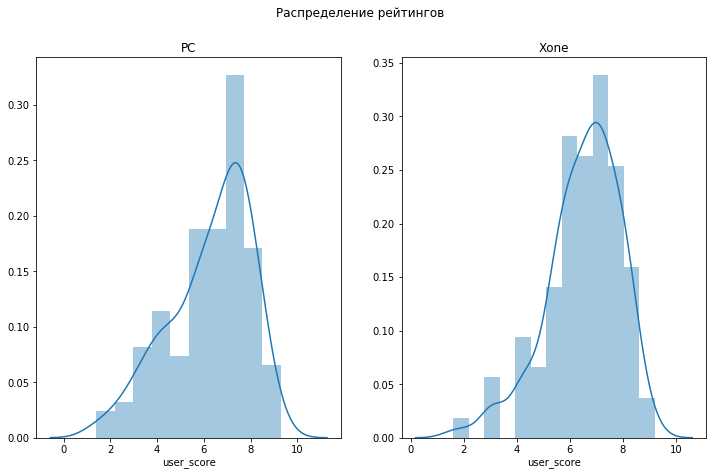

Итоги теста Стьюдента на равенство средних пользовательских рейтингов:

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу

Итоги теста Манна Уитни на равенство средних пользовательских рейтингов:

p-значение: 0.2505503367311187
Не получилось отвергнуть нулевую гипотезу

Средний рейтинг пользователей на платформах PC и Xone соответственно : 6.2696774193548395 и 6.521428571428572 .
--------------------------------------------------------------------------------------------------------------------------


In [ ]:
stat_rating_pc = actual_games.query('user_score != -1 & platform == "pc"')['user_score']
stat_rating_xone = actual_games.query('user_score != -1 & platform == "xone"')['user_score']
    
normal_test([stat_rating_pc,stat_rating_xone],['PC','Xone'])
plot_hist_rating([stat_rating_pc,stat_rating_xone],'Распределение рейтингов',['PC','Xone'])
t_test(stat_rating_pc,stat_rating_xone, 0.05)

mannwhitney(stat_rating_pc, stat_rating_xone)


print()
print('Средний рейтинг пользователей на платформах PC и Xone соответственно :',stat_rating_pc.mean(), 'и',stat_rating_xone.mean(),'.' )
print('--------------------------------------------------------------------------------------------------------------------------')

***Гипотезы:***

Нулевая : средние пользовательские рейтинги на платформах PC и Xbox One **равны**.  
Альтернативная : средние пользовательские рейтинги на платформах PC и Xbox One **не равны**.

Данные гипотезы двухсторонние.

***Вывод:*** Рейтинги пользователей в среднем не отличаются 

***PS***. Испоьзовался теста Манна Уитни так как данные не имеют нормального распределния. Также был проведен теста Стьюдента, но больше для интереса. 

### 5.2 Средние пользовательские рейтинги жанров Action и Sports  разные.

1.3413893222122192e-17
Распределения данных у  Action ненормальное
0.09123036297963909
Распределения данных у  Sports нормальное


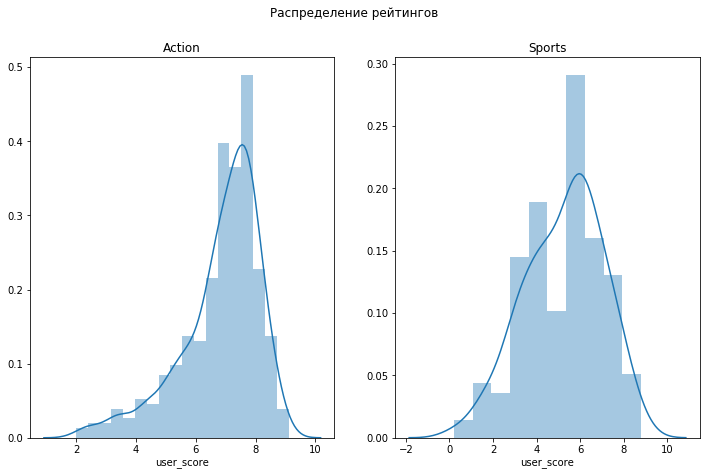

Итоги теста Стьюдента на равенство средних пользовательских рейтингов:

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу

Итоги теста Манна Уитни на равенство средних пользовательских рейтингов:

p-значение: 7.594585292409964e-24
Отвергаем нулевую гипотезу

Средний рейтинг пользователей в жанре action и sports соответственно : 6.837532133676092 и 5.238124999999999 .
--------------------------------------------------------------------------------------------------------------------------


In [ ]:
stat_rating_action = actual_games.query('user_score != -1 & genre == "action"')['user_score']
stat_rating_sports = actual_games.query('user_score != -1 & genre == "sports"')['user_score']


normal_test([stat_rating_action,stat_rating_sports],['Action','Sports'])
plot_hist_rating([stat_rating_action,stat_rating_sports],'Распределение рейтингов',['Action','Sports'])
t_test(stat_rating_action,stat_rating_sports, 0.05)
mannwhitney(stat_rating_action, stat_rating_sports)
print()
print('Средний рейтинг пользователей в жанре action и sports соответственно :',stat_rating_action.mean(), 'и',stat_rating_sports.mean(),'.' )
print('--------------------------------------------------------------------------------------------------------------------------')

***Гипотезы:***
  
Нулевая : средние пользовательские рейтинги в жанрах Action и Sports **равны**.  
Альтернативная : средние пользовательские рейтинги в жанрах Action и Sports **не равны**.

Гипотезы двухсторонние.

***Вывод:*** Рейтинги пользователей в среднем  отличаются 

Испоьзовался теста Манна Уитни так как данные не имеют нормального распределния. Также был проведен теста Стьюдента, но больше для интереса. 

## Итог проекта

**Было сделано:**
- Открыт и изучен файл с данными 
- Проведена предобработка данных (поменяны типы данных, проверены  дубликаты, заполнены пропуски и т.д)
- Определена текущая ситуация на рынке видеоигр и характерный срок "популярности" игровой платформы
- Определены более перспективные платформы
- Рассмотрены три основных региона , составлены портреты каждой публики 
- Проверены две гипотезы:  равенство средних рейтингов на платформах Xbox one и PC, а также равенство рейтингов двух жанров Action и Sports

**Основные выводы:**
- План работы с Японией должен быть иной, нежели с Европой или Северной Америкой, так как имеются сильные отличия в предпочтения клиентов.
- Самые перспективные иговые платфоры : Xbox one, PlayStation 4 и Nintendo 3DS ( последняя больше для Японии). Данные платформы недавно пришли на рынок и пока что все еще испытывают максимальную популярность. Характерный срок "популярности" / замены платформы оценивается в 5 - 6 лет. 
- Для работы с Европейским или Сев. Американским регионом следуюет сделать упор в игры жанра: Shooter или же Action. Для работы с Японией больший упор нужно сделать на RPG игры.
- Если же говорить более точно в каком регионе делать упор на конкретную платформу, то можно сказать , что в Европе и Северной Америке можно делать упор как на  игры для продукции Mirosoft так и на продукцию Sony. В Японии же можно делать упор на Sony 